In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [92]:
train_df = pd.read_csv('/Users/mbrettsc/code/data-science/datascience-3/Train_knight.csv')
test_df = pd.read_csv('/Users/mbrettsc/code/data-science/datascience-3/Test_knight.csv')

In [93]:
def standardize(df: pd.DataFrame):    
    numerical_columns = df.select_dtypes(include=[np.number])

    knight_column = df['knight'] if 'knight' in df.columns else None

    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(numerical_columns)
    
    standardized_df = pd.DataFrame(standardized_data, columns=numerical_columns.columns)

    if knight_column is not None:
        standardized_df = pd.concat([standardized_df, knight_column.reset_index(drop=True)], axis=1)
        
    return standardized_df

In [94]:
standardized_train_df = standardize(train_df)
standardized_test_df = standardize(test_df)
print(standardized_train_df)

     Sensitivity  Hability  Strength     Power   Agility  Dexterity  \
0      -0.672190 -0.447007 -0.701691 -0.647079 -0.408080  -0.812359   
1       1.671168  0.731340  1.624479  1.798709  0.139449  -0.019929   
2      -0.915010 -0.461465 -0.851698 -0.825470 -0.534659   0.148840   
3      -0.724850 -0.225314 -0.654097 -0.715305  1.551689   0.874940   
4      -0.830169  0.172288 -0.869971 -0.776442 -0.831973  -1.169325   
..           ...       ...       ...       ...       ...        ...   
393    -1.603097 -1.765116 -1.590684 -1.259634  0.081310  -1.000752   
394    -0.166071 -1.969941 -0.164131 -0.271100  2.405362   0.019320   
395    -0.718998 -0.189168 -0.705516 -0.704377  1.308834  -0.039553   
396    -1.235064  0.068671 -1.182308 -1.041666  0.300616  -0.132376   
397     1.595103  2.326565  1.777461  1.642174 -0.280765   2.013150   

     Awareness  Prescience  Reactivity  Midi-chlorien  ...     Evade  \
0    -0.770179   -0.867035    0.173459      -0.366543  ... -0.172521   
1  

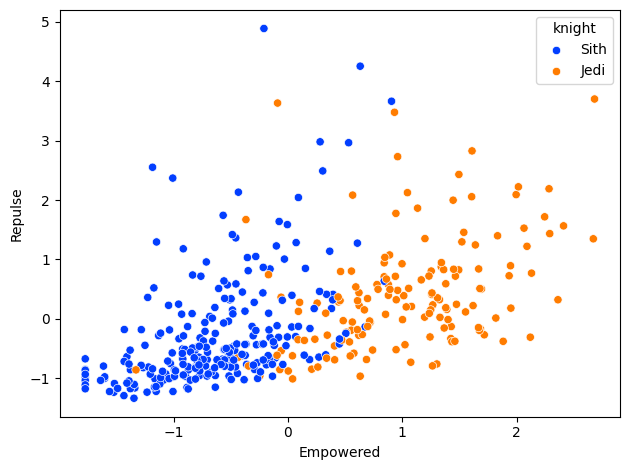

In [95]:
sns.scatterplot(data=standardized_train_df, x='Empowered', y='Repulse', hue="knight", palette='bright')

plt.tight_layout()
plt.show()

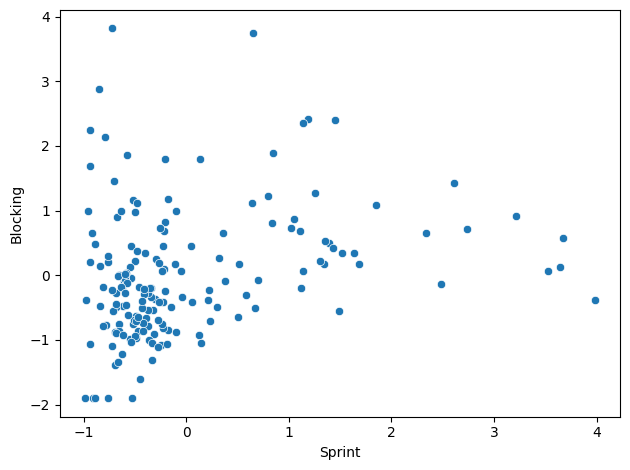

In [96]:
sns.scatterplot(data=standardized_test_df, x='Sprint', y='Blocking')

plt.tight_layout()
plt.show()